In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [5]:
model=Sequential()

In [6]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

In [7]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
from keras.utils import np_utils
import numpy as np
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255
y_Train_OneHot=np_utils.to_categorical(y_train_label)
y_Test_OneHot=np_utils.to_categorical(y_test_label)

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.3535 - acc: 0.8944 - val_loss: 0.1654 - val_acc: 0.9537
Epoch 2/10
 - 5s - loss: 0.1610 - acc: 0.9528 - val_loss: 0.1164 - val_acc: 0.9665
Epoch 3/10
 - 5s - loss: 0.1168 - acc: 0.9660 - val_loss: 0.0966 - val_acc: 0.9723
Epoch 4/10
 - 5s - loss: 0.0913 - acc: 0.9727 - val_loss: 0.0884 - val_acc: 0.9742
Epoch 5/10
 - 5s - loss: 0.0753 - acc: 0.9778 - val_loss: 0.0797 - val_acc: 0.9754
Epoch 6/10
 - 5s - loss: 0.0643 - acc: 0.9802 - val_loss: 0.0746 - val_acc: 0.9764
Epoch 7/10
 - 5s - loss: 0.0555 - acc: 0.9833 - val_loss: 0.0732 - val_acc: 0.9768
Epoch 8/10
 - 5s - loss: 0.0484 - acc: 0.9851 - val_loss: 0.0712 - val_acc: 0.9791
Epoch 9/10
 - 5s - loss: 0.0402 - acc: 0.9877 - val_loss: 0.0682 - val_acc: 0.9790
Epoch 10/10
 - 5s - loss: 0.0372 - acc: 0.9887 - val_loss: 0.0686 - val_acc: 0.9806


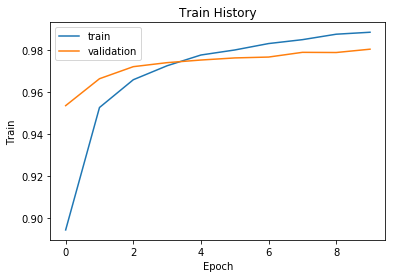

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

show_train_history(train_history,'acc','val_acc')

In [15]:
scores=model.evaluate(x_Test_normalize,y_Test_OneHot)

10000/10000 [==============================] - 1s 67us/step


In [16]:
print('accuracy=',scores[1])

accuracy= 0.9814
